# Umsetzung 

<br>**Motion-Flow Schätzung und Netzwerk-Design**<br><br>
Das Ziel dieses FCN-Netzwerks besteht darin, eine **End-to-End-Mapping** von einem unscharfen Bild auf dessen entsprechende Motion Flow Map zu erreichen. Gegeben sei ein beliebiges RGB-Bild mit der willkürlichen Größe $P\times Q$. Das FCN wird dazu verwendet eine Motion Flow-Map zu schätzen $M=(U,V)$ mit der gleichen Größe wie das Eingabebild, wobei $U(i,j)\in D_u^+$ and $V(i,j)\in D_v$, $\forall i,j$. 

RGB-Bild mit der willkürlichen Größe $$P\times Q$$

$$M=(U,V)$$ mit der gleichen Größe wie das Eingabebild

$$U(i,j)\in D_u^+$$

$$V(i,j)\in D_v, \forall i,j$$

**Abbildung 4**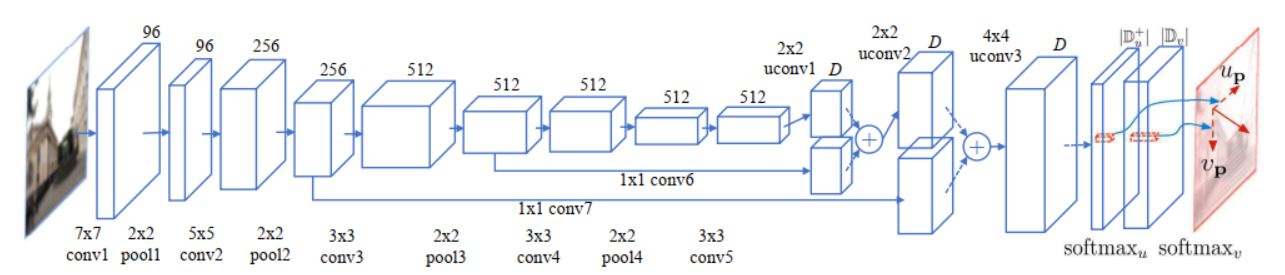

Zur Bequemlichkeit, lassen wir  $D=|D_u^+| + |D_v|$ die Gesamtzahl der Labels bezeichnen
sowohl für $U$ als auch für $V$. Die Netzwerkstruktur ist wie in Abbildung 4 gezeigt, verwendet werden 7 Faltungs-(conv) Layer und 4 Max-Pooling (Pool) Layer sowie 3 uconv-Layer zum Upsampling der Prediction-Map. Uconv bezeichnet  die fraktionierte Faltung, auch bekannt als Deconvolution. Es wird ein kleiner Stride(Schritt) von 1 Pixel für alle Faltungsschichten verwendet. Die uconv-Layer werden mit bilinearer Interpolation initialisiert und werden zum Upsampling der Aktivierungsfunktionen verwendet.


$$D=|D_u^+| + |D_v|$$

- **7 Faltungs-(conv) Layer**
- **4 Max-Pooling (Pool) Layer**
- **3 uconv-Layer** zum Upsampling der Prediction-Map
- **Skip-Verbindungen**
-Feature-Map des letzten uconv-Layers (conv7 + uconv2)
ist ein **$P \times Q \times D$-Tensor**
- Stride(Schritt) von 1 Pixel für alle Faltungsschichten
- uconv-Layer werden mit bilinearer Interpolation initialisiert, Upsampling der Aktivierungsfunktionen 

Es werden auch Skip-Verbindungen hinzugefügt, die die Informationen aus verschiedenen Schichten kombinieren, wie in Abbildung 4 gezeigt.
Die Feature-Map des letzten uconv-Layers (conv7 + uconv2)
ist ein $P \times Q \times D$-Tensor mit den oberen $|D_u^+|$-Slices von Feature-Maps ($P \times Q \times |D_u^+|$) entsprechend der Schätzung von $U$ und den verbleibenden $|D_v|$-Slices von Feature-Maps
($P \times Q \times |D_v|$) entsprechend der Schätzung von $V$. Zwei
separate Soft-Max-Layer werden jeweils auf diese beiden Teile angewendet, um die Posterior-Wahrscheinlichkeitsschätzung von beiden Kanälen zu erhalten. Sei $F_{u,i,j}(Y)$ die Wahrscheinlichkeit, dass
der Pixel bei $(i, j)$ eine Bewegung $u$ entlang der horizontalen
Richtung gemacht hat und $F_{v,i,j}(Y)$ repräsentiert die Wahrscheinlichkeit, dass der
Pixel bei $(i, j)$ eine Bewegung $v$ entlang der vertikalen Richtung gemacht hat. Es wird dann die Summe des Kreuzentropieverlustes von beiden Kanälen als die Finale Loss-Function verwendet.

**Posterior-Wahrscheinlichkeitsschätzung von beiden Kanälen**

$$F_{u,i,j}(Y)$$

$$F_{v,i,j}(Y)$$

mit den oberen $|D_u^+|$-Slices von Feature-Maps ($P \times Q \times |D_u^+|$) entsprechend der Schätzung von $U$ und den verbleibenden $|D_v|$-Slices von Feature-Maps
($P \times Q \times |D_v|$) entsprechend der Schätzung von $V$.

Posterior-Wahrscheinlichkeitsschätzung von beiden Kanälen zu erhalten. Sei $F_{u,i,j}(Y)$ die Wahrscheinlichkeit, dass
der Pixel bei $(i, j)$ eine Bewegung $u$ entlang der horizontalen
Richtung gemacht hat und $F_{v,i,j}(Y)$ repräsentiert die Wahrscheinlichkeit, dass der
Pixel bei $(i, j)$ eine Bewegung $v$ entlang der vertikalen Richtung gemacht hat.

Es wird dann die **Summe des Kreuzentropieverlustes von beiden Kanälen** als die **Finale Loss-Function** verwendet.

\begin{eqnarray}
\begin{split}
   L(Y,M)\! =\! &-\!\sum_{i=1}^P\sum_{j=1}^Q \! \sum_{u\in D_u^+}\! 1(U(i,j)=u) \log(F_{u,i,j}(Y)) \\
     & -\!\sum_{i=1}^P\sum_{j=1}^Q \!\sum_{v\in D_v} 1(V(i,j)=v) \log(F_{v,i,j}(Y)),
\end{split}
   \label{eq:loss_fun}
   \nonumber
\end{eqnarray}
$1$ ist eine Indikator Funktion
<br>

<br>**Simulation von Motion-Flow-Maps zur Datengenerierung**

Der Kern dieses Abschnitts besteht darin, einen Datensatz zu generieren, der realistische Unschärfemuster auf verschiedenen Bildern für das Training enthält.
Obwohl zufällige Samples sehr unterschiedliche Trainingssamples erzeugen kann, da der realistische Motion Flow einige Eigenschaften wie die stückweise Glätte beibehält.
So ist es das Ziel, eine Simulationsmethode zu schaffen, die Motion Flows erzeugen kann, die die natürlichen Eigenschaften der Bewegung in dem Prozess der Bilderstellung widerspiegelt. Obwohl die Objektbewegung in realen Bildern zu heterogenen Bewegungsunschärfen führen kann, simuliert diese Methode nur den Motion Flow durch Kamerabewegungen fürs Training des FCN. Trotzdem werden Daten, die von dieser Methode erzeugt wurden dem Machine-Learning-Modell auch eine gewisse Handhabung mit Objektbewegung verleihen.


- einen Datensatz zu generieren, der realistische Unschärfemuster auf verschiedenen Bildern für das Training enthält.

- eine Simulationsmethode zu schaffen, die Motion Flows erzeugen kann, die die natürlichen Eigenschaften der Bewegung in dem Prozess der Bilderstellung widerspiegelt.

- Obwohl die Objektbewegung in realen Bildern zu heterogenen Bewegungsunschärfen führen kann, simuliert diese Methode nur den Motion Flow durch Kamerabewegungen fürs Training des FCN.

- Trotzdem werden Daten, die von dieser Methode erzeugt wurden dem Machine-Learning-Modell auch eine gewisse Handhabung mit Objektbewegung verleihen.

**Abbildung 5**![OBR5.PNG](./OBR5.PNG)

Der Einfachheit halber wird ein 3D-Koordinatensystem generiert,
wobei der Ursprung im optischen Zentrum der Kamera, die xy-Ebene
auf die Ebene des Kamerasensors ausgerichtet ist und die z-Achse steht senkrecht zur xy-Ebene, wie in Abbildung 5 gezeigt. Da das
Ziel der Motion Flow auf einem Bildraster ist, wird 
der simuliere Motion Flow , der auf ein 2D-Bild projiziert wird.
Der simuliere Motion Flow wird direkt auf ein 2D-Bild projiziert, anstatt
auf die 3D-Bewegungsbahn. In Anbetracht der Unklarheiten
verursacht durch Drehungen um die x- und y-Achse, wird ein
Motion Flow M durch Sampeling von vier additiven Komponenten simuliert:


- Einfachheit halber wird ein 3D-Koordinatensystem generiert,
wobei der Ursprung im optischen Zentrum der Kamera, die xy-Ebene
auf die Ebene des Kamerasensors ausgerichtet ist

- die z-Achse steht senkrecht zur xy-Ebene

- Ziel der Motion Flow auf einem Bildraster ist, wird 
der simuliere Motion Flow , der auf ein 2D-Bild projiziert wird.
Der simuliere Motion Flow wird direkt auf ein 2D-Bild projiziert, anstatt
auf die 3D-Bewegungsbahn.

\begin{equation}
   M = M_{T_x}+M_{T_y}+M_{T_z}+M_{R_z},
   \label{eq:mf_decomp}
\end{equation}

wobei $M_{T_x}$, $M_{T_y}$ und $M_{T_z}$ die Motion Flows bezeichnet, die mit den Translationen entlang der $x$-, $y$- und $z$-Achse zusammenhängen.
$M_{R_z}$ repräsentiert die Bewegung aus der Rotation um die z
Achse. Jedes Element wird wie folgt generieren.



**Translation entlang der $x$- oder $y$-Achse** <br>
Als Beispiel beschreiben wir die Erzeugung von $M_{T_x}$. Wir tasten zunächst ein zentrales Pixel $p_{T_x}=(i_{T_x}, j_{T_x})$ auf der Bildebene ab, einen einfachen Bewegungswert $t_{T_x}$ und einen Beschleunigungskoeffizienten $r_{T_x}$. Dann
kann $M_{T_x}=(U_{T_x}, V_{T_x})$  wie folgt generiert werden
$U_{T_x}(i,j) = (i-i_{T_x})r_{T_x} + t_{T_x}, V_{T_x}(i,j) = 0$. $M_{T_y}$ kann
auf ähnliche Weise erzeugt werden.


$$p_{T_x}=(i_{T_x}, j_{T_x})$$

Beschleunigungskoeffizienten $$r_{T_x}$$

Bewegungswert $$t_{T_x}$$ 

$$M_{T_x}=(U_{T_x}, V_{T_x})$$  wie folgt generiert werden


$$U_{T_x}(i,j) = (i-i_{T_x})r_{T_x} + t_{T_x}$$

 $$V_{T_x}(i,j) = 0$$

$M_{T_y}$ kann
auf ähnliche Weise erzeugt werden.

![xy_Axis.PNG](./xy_Axis.PNG)

**Translation entlang der $z$-Achse**<br>
Die Translation entlang der z-Achse verursacht normalerweise ein radiales Bewegungsunschärfemuster in Richtung des Fluchtpunkts. Indem man den semantischen Kontext ignoriert und ein
einfaches radiales Muster annimmt, kann $M_{T_z}$ durch $U_{T_z}(i,j) = t_{T_z} d(i,j)^ζ (i-i_{T_z}), V_{T_z}(i,j) = t_{T_z} d(i,j)^ζ (j-j_{T_z})$ erzeugt werden, wobei
$p_{T_z}$ einen abgetasteten Fluchtpunkt bezeichnet, $d(i,j) = \|(i,j)-p_{T_z}\|_2$ ist der Abstand von einem beliebigen Pixel $(i,j)$ zum Fluchtpunkt, ζ und $t_{T_z}$ werden verwendet, um die Form des radialen Musters zu steuern, welches die Bewegungsgeschwindigkeit widerspiegelt.


$$ζ , t_{T_z}$$ Form des radialen Musters zu steuern, welches die Bewegungsgeschwindigkeit widerspiegelt.

$$p_{T_z}$$ einen abgetasteten Fluchtpunkt bezeichnet

$$d(i,j) = \|(i,j)-p_{T_z}\|_2$$ ist der Abstand von einem beliebigen Pixel $(i,j)$ zum Fluchtpunkt

$$U_{T_z}(i,j) = t_{T_z} d(i,j)^ζ (i-i_{T_z})$$

 $$V_{T_z}(i,j) = t_{T_z} d(i,j)^ζ (j-j_{T_z})$$

![z_axis.PNG](./z_axis.PNG)

**Rotation um die z-Achse**<br>
Wir tasten zunächst ein Rotationszentrum $p_{R_z}$ und eine Winkelgeschwindigkeit $\omega$ ab, wobei $\omega>0$ die Drehung im Uhrzeigersinn bezeichnet. Sei $s(i,j)=2d(i,j)tan(\omega/2)$. Die Bewegungsgröße an jedem Pixel ist $s(i,j)=2d(i,j)\tan(\omega/2)$. Indem $\theta(i,j)=\text{atan}[(i-i_{R_z})/(j-j_{R_z})] \in [-\pi, \pi]$, Bewegungsvektor am Pixel $(i, j)$ kann als $\theta(i,j)=\text{atan}[(i-i_{R_z})/(j-j_{R_z})] \in [-\pi, \pi]$ erzeugt werden;  $U_{R_z}(i,j) = s(i,j) \cos(\theta(i,j)-\pi/2), V_{R_z}(i,j) = s(i,j) \sin(\theta(i,j)-\pi/2)$.
Wir setzen einheitliche Prioritäten über alle Parameter, die der Motion-Flow-Simulation entsprechen, als $\text{Uniform}(\alpha, \beta)$.
Hinweis: Die vier Komponenten werden in kontinuierlicher Domäne simuliert und werden dann als ganze Zahlen diskretisiert.


Rotationszentrum $$p_{R_z}$$

Winkelgeschwindigkeit $$\omega$$ ab, wobei $$\omega>0$$ die Drehung im Uhrzeigersinn

$$s(i,j)=2d(i,j)tan(\omega/2)$$. Die Bewegungsgröße an jedem Pixel

Bewegungsvektor am Pixel $(i, j)$

$$\theta(i,j)=\text{atan}[(i-i_{R_z})/(j-j_{R_z})] \in [-\pi, \pi]$$

$$U_{R_z}(i,j) = s(i,j) \cos(\theta(i,j)-\pi/2)$$

$$V_{R_z}(i,j) = s(i,j) \sin(\theta(i,j)-\pi/2)$$

![z_rotation.PNG](./z_rotation.PNG)

**Erstellung von Trainingsdatensätzen**<br>
Es wurden 200 Trainingsbilder mit Größen um $300\times 460$ aus dem Datensatz BSD500
als unser Bildersatz mit scharfen Bildern $\{X^n\}$ verwendet. Wir simulieren dann unabhängig 10.000 Motionflow-Maps $\{M^t\}$ mit Reichweiten von $u_{max}=v_{max}=36$ und weisen jedem  $X^n$ 50 Motion Flow-Maps zu ohne Duplizierung. Die nicht verunschärften Bilder $\{X^n\}$ mit
$U(i,j)=0$ und $V(i,j)=0$, $\forall i,j$ werden zum Training verwendet.
Als Ergebnis haben wir einen Datensatz mit 10.200 Bewegungsunschärfe-MotionFlow-Paaren $\{Y^t, M^t\}$ für das Training.


- 200 Trainingsbilder mit Größen um $300\times 460$ Datensatz BSD500

- 10.000 Motionflow-Maps $\{M^t\}$ mit Reichweiten von $u_{max}=v_{max}=36$

- jedem  $X^n$ 50 Motion Flow-Maps zu ohne Duplizierung

- 10.200 Bewegungsunschärfe-MotionFlow-Paaren

**5. Experiments**

Das Modell auf Basis von Caffe implementiert und es wird durch stochastischen Gradientenabstieg mit Impuls und Batch Größe 1 trainiert. Im Training mit dem auf BSD simulierten Datensatz wird eine Lernrate von $10^{− 9}$ und eine Schrittweite von $2 × 10^5$ verwendet. Das
Training konvergiert nach **65 Epochen**.


**5.1. Datensätze und Bewertungsmetriken**<br>
Es werden die Experimente an synthetischen
Datensätzen und Datensätzen von realen Bildern durchgeführt. Da ein Ground-Truth-Motionflow und ein scharfes Bild von einem echten verschwommenen Bild schwer zu erhalten sind. Um eine allgemeine quantitative Bewertung durchzuführen
werden zunächst zwei synthetische Datensätze generiert, die beide 300 unscharfe Bilder enthalten, mit 100 zufälligen scharfen Bildern 
aus dem $BSD500$-Datensatz und 3 verschiedenen Motion-Flow-Maps
für jedes scharfe Bild. Beachte, dass keine zwei Motion-Flow-Maps gleich sind.
Simuliert wird der Motion-Flow mit $umax = vmax = 36$,
dies ist das gleiche wie im Trainingsset. Aus Fairness gegenüber der
Methode noMRF Sun et. al. mit einem kleineren Ausgaberaum generieren wir auch relativ milde Motion-Flows für den zweiten Datensatz mit
$umax = vmax = 17$. Diese beiden werden als $BSD-S$ und
BSD-M bezeichnet. Darüber hinaus bewerten wir die Generalisierungsfähigkeit der vorgeschlagenen Methode anhand von zwei synthetischen
Datensätzen (MC-S und MC-M) mit 60 verschwommenen Bildern, generiert aus 20 scharfen Bildern von Microsoft COCO und
über der Einstellung für die Motion-Flow-Erzeugung.
Bewertungsmetriken Zur Bewertung der Genauigkeit des geschätzten Motion-Flows wird der mittleren quadratischen Fehler
(MSE) der Motion-Flow-Map gemessen. Insbesondere bei einem gegebenen geschätzten Motion-Flow $M$ und dem Ground-Truth $\kappa$ ist der $MSE$
definiert als $\frac{1}{2|M|} \!\sum_{i,j}((U(i; j) − \hat U (i; j))^2 + ((V(i; j) −
\hat V (i; j))^2$, wobei $|M|$ die Anzahl der Bewegungsvektoren bezeichnet
in $M$. Zur Beurteilung der Bildqualität verwenden wir Peak
Signal-Rausch-Verhältnis $(PSNR)$ und struktureller Ähnlichkeitsindex
$(SSIM)$.


- 2 synthetische Datensätze (300 unscharfe Bilder enthalten, 100 zufällige scharfe Bilder)

- 100 zufällige scharfe Bilder aus dem  𝐵𝑆𝐷500-Datensatz und 3 verschiedenen Motion-Flow-Maps für jedes scharfe Bild

- Simuliert wird der Motion-Flow mit $umax = vmax = 36$, BSD-S

- zweiten Datensatz mit
$umax = vmax = 17$, BSD-M

- Datensätzen (MC-S und MC-M) mit 60 verschwommenen Bildern, generiert aus 20 scharfen Bildern von Microsoft COCO und
über der Einstellung für die Motion-Flow-Erzeugung.

- Bewertung der Genauigkeit des geschätzten Motion-Flows wird der mittleren quadratischen Fehler
(MSE) der Motion-Flow-Map gemessen

$MSE$
definiert als $$\frac{1}{2|M|} \!\sum_{i,j}((U(i; j) − \hat U (i; j))^2 + ((V(i; j) −
\hat V (i; j))^2$$, wobei $|M|$ die Anzahl der Bewegungsvektoren bezeichnet
in $M$.

Zur Beurteilung der Bildqualität verwenden wir Peak
Signal-Noise-Ratio $(PSNR)$ und strukturellen Ähnlichkeitsindex
$(SSIM)$.

Tabelle 1![OBR6.PNG](./OBR6.PNG)

**5.2. Auswertung der Motion-Flow-Schätzung**<br>
Wir vergleichen zunächst mit der Methode von Sun et.al.
(„patchCNN“), die einzige Methode mit verfügbarem Code zum Schätzen des Motion-Flows aus verschwommenen Bildern.
Diese Methode führt Training und Tests an kleinen Bildfeldern durch und verwendet MRF, um die Genauigkeit auf dem gesamten Bild zu verbessern.
Seine Version ohne MRF-Nachbearbeitung
(„noMRF“) wird auch verglichen, wobei die Soft-Max-Ausgabe
direkt verwendet wird um den Motion-Flow wie in unserer Methode zu erhalten. Tabelle 2 zeigt den durchschnittlichen $MSE$ der geschätzten Motion-Flow-Maps auf allen Bildern in BSD-S und BSD-M. Bemerkenswert ist, dass auch ohne Nachbearbeitung wie $MRF$ oder
$CRF$ der Vergleich die hohe Qualität unserer geschätzten Motion-Flow-Maps zeigt. Darüber hinaus kann unsere Methode immer noch einen präzisen Motion-Flow
erzeugen auch bei schwierigeren BSD-S-Datensatz, auf dem die Genauigkeiten der Patch basierenden Methode noMRF Sun et. al. deutlich abnimmt. Wir zeigen auch ein Beispiel für den geschätzten Motion-Flow in Abbildung 6, die
zeigt, dass unser Ergebnis einen reibungslosen Motion-Flow beibehält
sehr ähnlich des Ground Truth, und die Methode von Sun et.al. 
reagiert empfindlicher auf die Bildinhalte. Aus diesem Beispiel,
kann man sehen, **dass die Methode von Sun et.al. im Allgemeinen die Motionvalues und erzeugte Fehler in der Nähe von
starken Kanten unterschätzt,** vielleicht weil die Verarbeitung auf Patch-Ebene
durch die starken Kanten verwirrt ist und das Unschärfemuster
in einem größeren Bereich ignoriert.

Zum Vergleich mit **anderen blinden Deblurring-Methoden von Xu
und Jia, Xu et al. und Whyte et.al., die
den Motion-Flow nicht schätzen,** es wird direkt die 
Qualität des Bildes ausgewertet, das mit ihrem geschätzten Blur-
Kernel wiederhergestellt wurde. Da die
Nicht-blinde Dekonvolutionsmethode die Wiederherstellungsqualität einschränken kann, bewerten wir die gewonnenen Bilder unter Verwendung des Groundtruth-Motion-Flows als Referenz. Tabelle 1 zeigt die Durchschnitts
Werte auf allen Bildern in jedem Datensatz, was zeigt, dass dieses
Verfahren  deutlich bessere Ergebnisse als die anderen liefert.


- Training und Tests an kleinen Bildfeldern durch und verwendet MRF, um die Genauigkeit auf dem gesamten Bild zu verbessern.

- ohne MRF-Nachbearbeitung
(„noMRF“) wird auch verglichen wobei die Soft-Max-Ausgabe
direkt verwendet wird um den Motion-Flow wie in unserer Methode zu erhalten.

- Tabelle 2 zeigt den durchschnittlichen $MSE$ der geschätzten Motion-Flow-Maps auf allen Bildern in BSD-S und BSD-M.

- auch ohne Nachbearbeitung wie $MRF$ oder
$CRF$ der Vergleich die hohe Qualität unserer geschätzten Motion-Flow-Maps zeigt.

- blinden Deblurring-Methoden von Xu
und Jia, Xu et al. und Whyte et.al., die
den Motion-Flow nicht schätzen, es wird direkt die 
Qualität des Bildes ausgewertet, das mit ihrem geschätzten Blur-
Kernel wiederhergestellt wurde.

- Nicht-blinde Dekonvolutionsmethode die Wiederherstellungsqualität einschränken kann, bewerten wir die gewonnenen Bilder unter Verwendung des Groundtruth-Motion-Flows als Referenz.

Tabelle 2![OBR8.PNG](./OBR8.PNG)

**5.3. Bewertung der Generalisierungsfähigkeit**<br>
Um die Verallgemeinerungsfähigkeit unseres Ansatzes für unterschiedliche Bilder zu bewerten, verwenden wir die Datensätze auf Basis der Microsoft
COCO (d. h. MC-S und MC-M) zur Evaluierung unseres Modells, das
auf dem Datensatz basierend auf BSD500 trainiert wurde. Tabelle 3 zeigt
die Auswertung und den Vergleich mit dem „patchCNN“.
Die Ergebnisse zeigen, dass unsere Methode stabil Ergebnisse mit hoher Genauigkeit für beide Datensätze produziert. Dieses Experiment
legt nahe, dass die Verallgemeinerungsfähigkeit unseres Ansatzes sehr gut ist.


- Microsoft
COCO (d. h. MC-S und MC-M)

- Experiment
legt nahe, dass die Verallgemeinerungsfähigkeit unseres Ansatzes sehr gut ist.

Tabelle 3![OBR10.PNG](./OBR10.PNG)

**5.4. Laufzeitauswertung**<br>
Wir führen einen Laufzeitvergleich mit den relevanten
Motion-Flow-Schätzungsmethoden durch. Durch Ausführen einer Bewegungsflussschätzung für 60 verschwommene Bilder mit Größen von etwa
640 × 480 auf einem PC mit NVIDIA GeForce 980 Grafikkarte und Intel Core i7 CPU. Für die Methode in gilt:
zitiert wird die Laufzeit aus dem Paper. Beachten Sie, dass sowohl die
Methode von Sun et.al. und diese Methode die GPU verwendet, um die
Berechnungen durchzuführen. Wie in Tabelle 4 gezeigt, braucht die Methode in
sehr lange Zeit aufgrund des iterativen Optimierungsschemas. Unsere
Methode dauert weniger als 10 Sekunden, was effizienter ist
als andere. Die Methode patchCNN benötigt mehr Zeit
weil viele Nachbearbeitungsschritte erforderlich sind.


- Bewegungsflussschätzung für 60 verschwommene Bilder mit Größen von etwa
640 × 480 auf einem PC mit **NVIDIA GeForce 980 Grafikkarte und Intel Core i7 CPU.**

- patchCNN benötigt mehr Zeit
weil viele Nachbearbeitungsschritte erforderlich sind.

- Sun et.al. und diese Methode die GPU verwendet, um die
Berechnungen durchzuführen. Wie in Tabelle 4 gezeigt, braucht die Methode in
sehr lange Zeit aufgrund des iterativen Optimierungsschemas.

Tabelle 4![OBR11.PNG](./OBR11.PNG)

**5.5. Auswertung an realen Bildern**<br>
Da die Ground-Truth-Bilder von realen verschwommenen Bildern nicht verfügbar sind, präsentieren wir nur die visuelle Bewertung
und Vergleich mit mehreren modernen Methoden für
räumlich variierende Unschärfeentfernung. 
Wir vergleichen zunächst die
vorgeschlagene Methode mit der Methode von Sun et.al. zur Motion-Flow-Schätzung. Vier Beispiele sind in Abbildung 7 dargestellt.
Da das Verfahren von Sun et.al. auf lokalen Patches durchgeführt wird,
werden ihre Motion-Flow-komponenten oft falsch eingeschätzt, insbesondere wenn das Unschärfemuster in einem kleinen lokalen Bereich subtil oder verwirrend ist, wie beispielsweise in Bereichen mit geringer Beleuchtung oder Texturen. Dank des universellen End-to-End-Mappings können unsere
Methoden natürlichere Ergebnisse mit glattem Fluss erzeugen
und weniger Unordnung. Obwohl wir unser Modell auf Datensätzen trainieren
mit nur sanft variierenden Motion-Flows, verglichen mit
noMRF Sun et.al. kann unsere Methode bessere Ergebnisse bei Bildern mit
bewegtem Objekt liefern.
**Vergleich mit der Methode  Kim et.al.** Bei Kim et. al. verwenden sie
ein ähnliches heterogenes Bewegungsunschärfemodell wie unseres und
schätzen auch den Motion-Flow zum Entschärfen. Weil ihr Code 
nicht verfügbar ist, führen wir direkt einen Vergleich mit ihren realen Daten durch. Abbildung 8 zeigt die Ergebnisse an einem Beispiel. Verglichen mit den Ergebnissen von Kim und Lee ist spiegelt unser Bewegungsfluss das komplexe Unschärfemuster genauer wider, und unser
wiederhergestelltes Bild enthält mehr Details und weniger Artefakte.



- Da die Ground-Truth-Bilder von realen verschwommenen Bildern nicht verfügbar sind, präsentieren wir **nur die visuelle Bewertung**
und Vergleich mit mehreren modernen Methoden für
räumlich variierende Unschärfeentfernung.

- Da das Verfahren von Sun et.al. auf lokalen Patches durchgeführt wird,
werden ihre Motion-Flow-komponenten oft falsch eingeschätzt,insbesondere wenn das Unschärfemuster in einem kleinen lokalen Bereich subtil oder verwirrend ist, wie beispielsweise in Bereichen mit geringer Beleuchtung oder Texturen.

- universellen End-to-End-Mappings können unsere
Methoden natürlichere Ergebnisse mit glattem Fluss erzeugen
und weniger Unordnung.

- noMRF Sun et.al. kann unsere Methode bessere Ergebnisse bei Bildern mit
bewegtem Objekt liefern.

- Abbildung 8 zeigt die Ergebnisse an einem Beispiel. Verglichen mit den Ergebnissen von Kim und Lee ist spiegelt unser Bewegungsfluss das komplexe Unschärfemuster genauer wider, und unser
wiederhergestelltes Bild enthält mehr Details und weniger Artefakte.

Abbildung 7![OBR9.PNG](./OBR9.PNG)

Abbildung 8![OBR14.PNG](./OBR14.PNG)

**Bilder mit Kamerabewegungsunschärfe** Abbildung 9 zeigt ein Beispiel mit Unschärfe, die hauptsächlich durch die Kamerabewegung verursacht wird.
Das unscharfe Bild, das von der ungleichmäßigen Kameraschütteln erzeugt wird.
Die Shake-Deblurring-Methode Whyte et.al. leidet unter starker Unschärfe, da ihr Modell die Unschärfe ignoriert, die durch große Vorwärtsbewegungen verursacht wird
. Verglichen mit dem Ergebnis von Sun et.al., liefert unsere
Methode  ein schärferes Ergebnis mit mehr Details und weniger
Artefakte.
**Bilder mit Objektbewegungsunschärfe** Wir evaluieren unsere Methode
auf Bildern mit Objektbewegungsunschärfe. In Abbildung 10
enthält das Ergebnis von Whyte et.al.  starke Ringing-Artefakte aufgrund der Objektbewegung. Unsere Methode kann mit  
starker Unschärfe im Hintergrund umgehen und erzeugt ein natürlicheres
Bild. Wir vergleichen weiter mit dem segmentierungsbasierten
Entschärfeverfahren von Pan et.al. auf einem Bild mit großem
Skalenunschärfe durch bewegte Objekte auf statischem Hintergrund.
Wie in Abbildung 11 gezeigt, ist das Ergebnis von Sun et.al. aufgrund der Unterschätzung des Motion-Flows zu glatt. In dem
Ergebnis von Pan et.al. einige Details aufgrund der
Segmentierungsfehler verloren gehen. Unsere vorgeschlagene Methode kann die

Details auf unscharfem, sich bewegendem Vordergrund wiederherstellen und behält die Schärfe im
Hintergrund wie im Original.


- Abbildung 9 zeigt ein Beispiel mit Unschärfe, die hauptsächlich durch die Kamerabewegung verursacht wird.

- Whyte et.al. leidet unter starker Unschärfe, da ihr Modell die Unschärfe ignoriert, die durch große Vorwärtsbewegungen verursacht wird

- liefert unsere
Methode  ein schärferes Ergebnis mit mehr Details und weniger
Artefakte.

- Wir evaluieren unsere Methode
auf Bildern mit Objektbewegungsunschärfe.

- In Abbildung 10
enthält das Ergebnis von Whyte et.al.  starke Ringing-Artefakte aufgrund der Objektbewegung. Unsere Methode kann mit  
starker Unschärfe im Hintergrund umgehen und erzeugt ein natürlicheres
Bild.

- Wir vergleichen weiter mit dem segmentierungsbasierten
Entschärfeverfahren von Pan et.al. auf einem Bild mit großem
Skalenunschärfe durch bewegte Objekte auf statischem Hintergrund.

- Abbildung 11 gezeigt, ist das Ergebnis von Sun et.al. aufgrund der Unterschätzung des Motion-Flows zu glatt.einige Details aufgrund der
Segmentierungsfehler verloren gehen. Unsere vorgeschlagene Methode kann die



- Details auf unscharfem, sich bewegendem Vordergrund wiederherstellen und behält die Schärfe im
Hintergrund wie im Original.

Abbildung 9![OBR12.PNG](./OBR12.PNG)

Abbildung 10![OBR13.PNG](./OBR13.PNG)

Abbildung 11![OBR4.PNG](./OBR4.PNG)

**6. Fazit**<br>
In diesem Papier haben wird ein flexibles und effizientes Deep
lernbasiertes Verfahren zum Schätzen und Entfernen der heterogenen Bewegungsunschärfe vorgestellt. Durch die Darstellung der Heterogenen
Bewegungsunschärfe als pixelweise lineare Bewegungsunschärfe. Die vorgeschlagene
Methode verwendet ein FCN, um eine dichte Motion-Flow-Karte zum Entfernen von Unschärfen zu schätzen
. Außerdem generieren wir automatisch
Trainingsdaten mit simulierten Motion-Flow-Maps für das Training
des FCN. Experimentelle Ergebnisse sowohl von synthetischen als auch realen Daten zeigen die Exzellenz der vorgeschlagenen Methode.
